In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [4]:
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [11]:
print('train data = ',len(x_train_image))
print(' test data = ',len(x_test_image))


train data =  60000
 test data =  10000


In [12]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

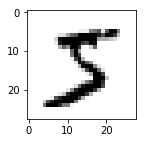

In [18]:
plot_image(x_train_image[0])

In [23]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num =10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx+i],cmap='binary')
        title="label=" + str(labels[idx+i])
        if len(prediction)>0:
            title +=', predict=' + str(prediction[idx+i])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

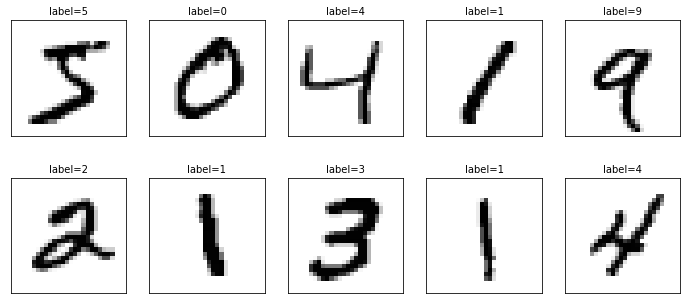

In [24]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

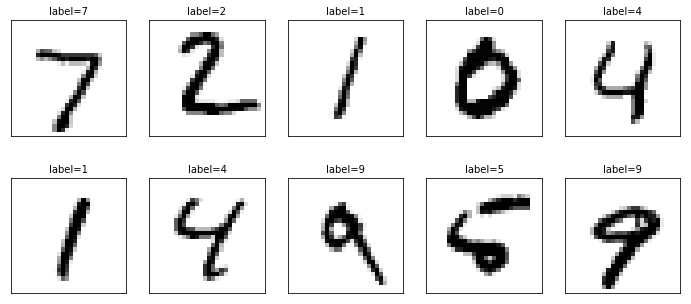

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

In [28]:
print('x_train_image:',x_train_image.shape)
print('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [64]:
x_train = x_train_image.reshape(60000,784).astype('float32') /255

In [65]:
x_test = x_test_image.reshape(10000,784).astype('float32')/255

In [32]:
y_train_label_one_hot = np_utils.to_categorical(y_train_label)
y_test_label_one_hot = np_utils.to_categorical(y_test_label)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()

In [52]:
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [53]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [60]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [68]:
train_history=model.fit(x=x_train,y=y_train_label_one_hot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.2734 - acc: 0.9522 - val_loss: 0.2483 - val_acc: 0.9548
Epoch 2/10
 - 4s - loss: 0.1734 - acc: 0.9656 - val_loss: 0.2016 - val_acc: 0.9593
Epoch 3/10
 - 4s - loss: 0.1268 - acc: 0.9724 - val_loss: 0.1711 - val_acc: 0.9637
Epoch 4/10
 - 5s - loss: 0.0959 - acc: 0.9770 - val_loss: 0.1598 - val_acc: 0.9631
Epoch 5/10
 - 4s - loss: 0.0771 - acc: 0.9812 - val_loss: 0.1415 - val_acc: 0.9664
Epoch 6/10
 - 4s - loss: 0.0616 - acc: 0.9846 - val_loss: 0.1334 - val_acc: 0.9672
Epoch 7/10
 - 4s - loss: 0.0515 - acc: 0.9868 - val_loss: 0.1268 - val_acc: 0.9685
Epoch 8/10
 - 4s - loss: 0.0406 - acc: 0.9898 - val_loss: 0.1196 - val_acc: 0.9695
Epoch 9/10
 - 4s - loss: 0.0339 - acc: 0.9921 - val_loss: 0.1162 - val_acc: 0.9699
Epoch 10/10
 - 4s - loss: 0.0279 - acc: 0.9938 - val_loss: 0.1119 - val_acc: 0.9702


In [46]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

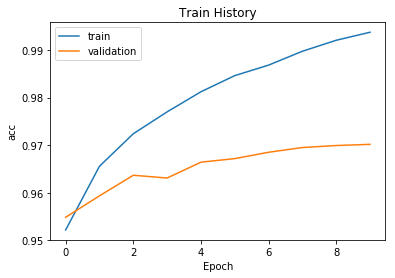

In [70]:
show_train_history(train_history,'acc','val_acc')

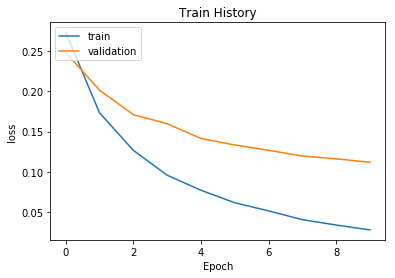

In [69]:
show_train_history(train_history,'loss','val_loss')

In [50]:
scores = model.evaluate(x_test,y_test_label_one_hot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.8328
